# Importando Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns


# Dataset de Exemplo

X = Gasto,
Y = Renda

In [ ]:
dataset = {
    'Y': [3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849, 2184, 2943, 1357, 2755, 2163, 3099, 1600, 353, 1778, 740, 2129, 3302, 2412, 2683, 2515, 2395, 2292, 1000, 600, 1864, 3027, 1978, 2791, 1982, 900, 1964, 1247, 3067, 700, 1500, 3110, 2644, 1378, 2601, 501, 1292, 2125, 1431, 2260, 1770],
    'X': [9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632, 6825, 8918, 4100, 9184, 6180, 9997, 4500, 1069, 5925, 2466, 6083, 9712, 7780, 8383, 7185, 7483, 7640, 2100, 2000, 6012, 8902, 5345, 8210, 5662, 2700, 6546, 2900, 9894, 1500, 5000, 8885, 8813, 3446, 7881, 1164, 3401, 6641, 3329, 6648, 4800]
}

In [4]:
df = pd.DataFrame(dataset)
df.head()

,Y,X
0,3011,9714
1,1305,3728
2,1879,6062
3,2654,8845
4,2849,8378


In [5]:
df.shape

(50, 2)

# Estatísticas Descritivas

In [6]:
df.describe()

,Y,X
count,50.000000,50.000000
mean,2011.120000,6065.500000
std,817.214648,2707.187812
min,353.000000,1069.000000
25%,1362.250000,3516.500000
50%,2127.000000,6363.000000
75%,2675.750000,8381.750000
max,3302.000000,9997.000000


# Análise Gráfica

<Axes: title={'center': 'Box plot'}, xlabel='Reais (R$)'>

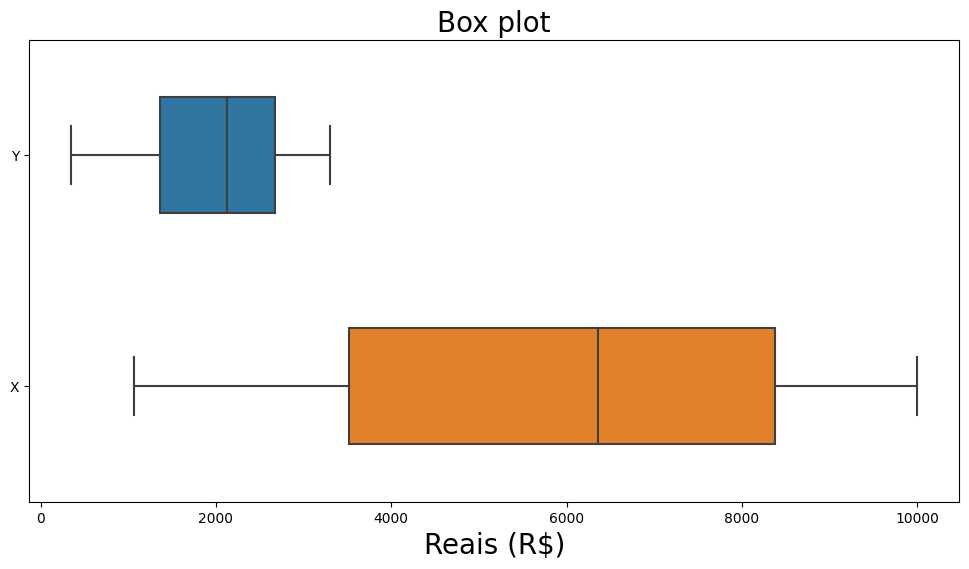

In [7]:
grafico = sns.boxplot(data=df, orient='h', width=0.5)
grafico.figure.set_size_inches(12,6)
grafico.set_title('Box plot',fontsize=20)
grafico.set_xlabel('Reais (R$)', fontsize=20)
grafico

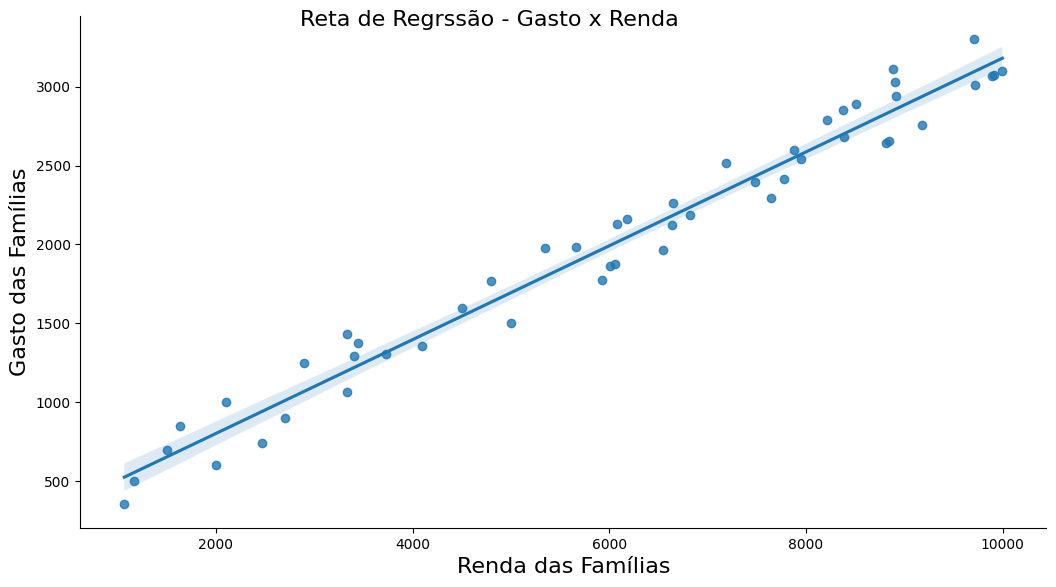

In [10]:
grafico = sns.lmplot(x="X",y="Y",data=df)
grafico.fig.set_size_inches(12,6)
grafico.fig.suptitle("Reta de Regrssão - Gasto x Renda",fontsize=16)
grafico.set_xlabels("Renda das Famílias",fontsize=16)
grafico.set_ylabels("Gasto das Famílias",fontsize=16)
grafico

# Análise da Correlação

In [12]:
df.cov() # Covariância


,Y,X
Y,6.678398e+05,2.178804e+06
X,2.178804e+06,7.328866e+06


In [13]:
df.corr()

,Y,X
Y,1.000000,0.984835
X,0.984835,1.000000


# Modelo de Regressão Linear Simples

In [15]:
import statsmodels.api as sm

In [16]:
Y = df.Y
X = sm.add_constant(df.X)

In [17]:
Y.head()

0    3011
1    1305
2    1879
3    2654
4    2849
Name: Y, dtype: int64

In [18]:
X.head()

,const,X
0,1.0,9714
1,1.0,3728
2,1.0,6062
3,1.0,8845
4,1.0,8378


# Estimando o Modelo

In [19]:
modelo_regressao = sm.OLS(Y,X).fit()


In [20]:
print(modelo_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           3.56e-38
Time:                        16:34:02   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.0

# Obtendo as Previsões dentro da amostra

In [21]:
df['Y_previsto'] = modelo_regressao.predict()
df

,Y,X,Y_previsto
0,3011,9714,3095.785086
1,1305,3728,1316.203010
2,1879,6062,2010.079483
3,2654,8845,2837.439476
4,2849,8378,2698.604723
5,1068,3338,1200.259640
6,2892,8507,2736.955222
7,2543,7947,2570.472435
8,3074,9915,3155.540515
9,849,1632,693.081721
